In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
avocado_df = pd.read_csv('avocado.csv')

avocado_df

FileNotFoundError: [Errno 2] No such file or directory: 'avocado.csv'

In [ ]:
new_avocado_df =avocado_df.dropna()
print(new_avocado_df.to_string)

<bound method DataFrame.to_string of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225   
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85  \
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    23

In [ ]:
avocado_df.fillna(130, inplace=True)

In [ ]:
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])

In [ ]:
avocado_df.drop_duplicates(inplace=True)

In [ ]:
avocado_df.set_index('Date', inplace=True)

In [ ]:
average_price_monthly = avocado_df['AveragePrice'].resample('M').mean()

In [ ]:
total_volume = avocado_df.groupby('Date')['Total Volume'].sum()

In [ ]:
average_price_by_region = avocado_df.groupby('region')['AveragePrice'].mean()

In [ ]:
avocado_df.duplicated()

Date
2015-12-27    False
2015-12-20    False
2015-12-13    False
2015-12-06    False
2015-11-29    False
              ...  
2018-02-04    False
2018-01-28    False
2018-01-21    False
2018-01-14    False
2018-01-07    False
Length: 18249, dtype: bool

In [ ]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18249 entries, 2015-12-27 to 2018-01-07
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 1.9+ MB


How does the average price of avocados vary between conventional and organic types?

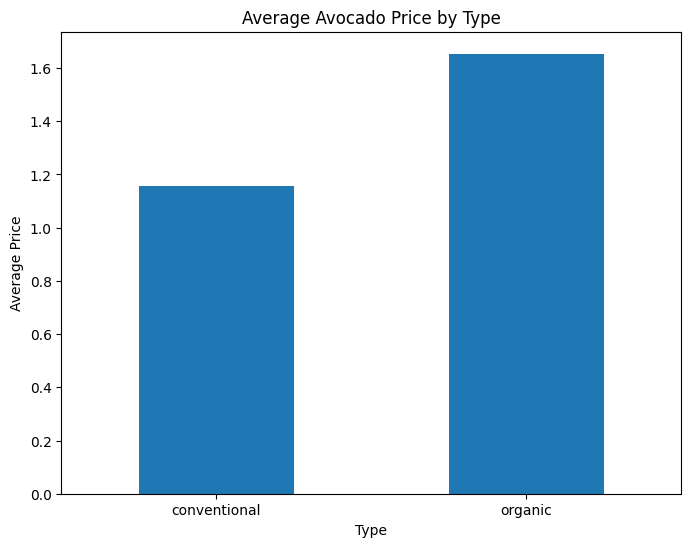

In [ ]:
average_price_by_type = avocado_df.groupby('type')['AveragePrice'].mean()

plt.figure(figsize=(8, 6))
average_price_by_type.plot(kind='bar')
plt.title('Average Avocado Price by Type')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()


What is the average price of avocados in each region?

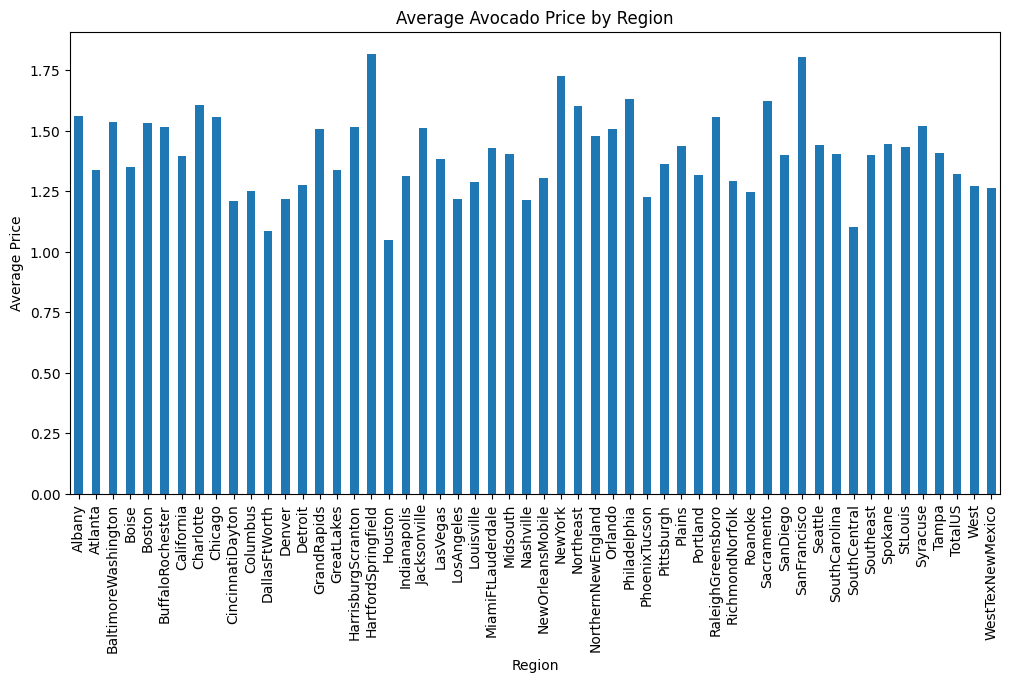

In [ ]:
average_price_by_region = avocado_df.groupby('region')['AveragePrice'].mean() #sort it out by the top 5


plt.figure(figsize=(12, 6))
average_price_by_region.plot(kind='bar')
plt.title('Average Avocado Price by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


How does the average price of avocados vary based on bag size?

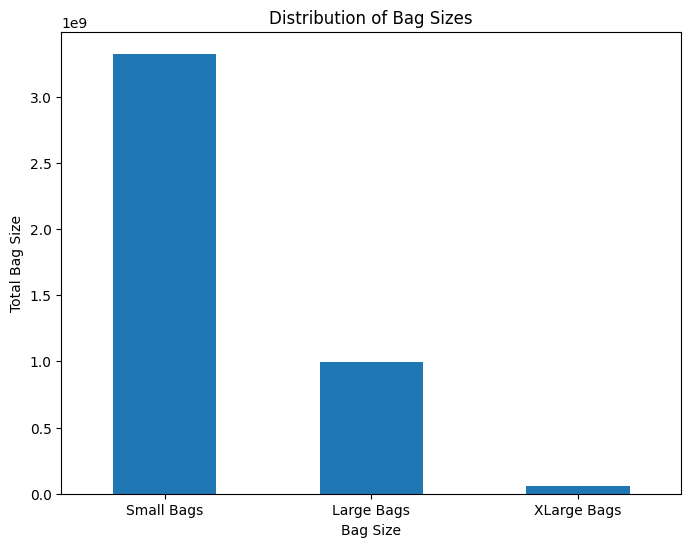

In [ ]:
bag_size_columns = ['Small Bags', 'Large Bags', 'XLarge Bags']

bag_size_data = avocado_df[bag_size_columns]

total_bag_size = bag_size_data.sum()

total_bag_size.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Bag Size')
plt.ylabel('Total Bag Size')
plt.title('Distribution of Bag Sizes')
plt.xticks(rotation=0)
plt.show()


Are there any outliers in the average price of avocados?

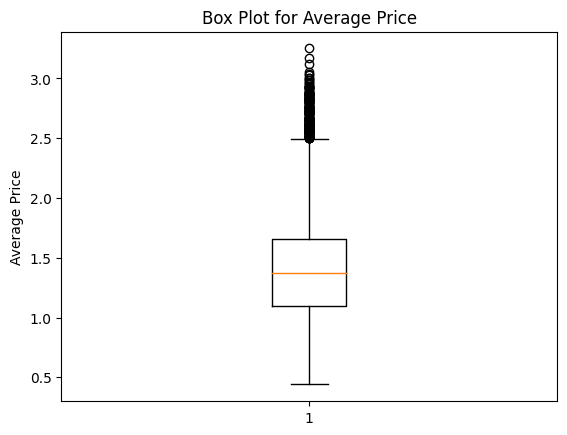

In [ ]:
plt.boxplot(avocado_df['AveragePrice'])
plt.title('Box Plot for Average Price')
plt.ylabel('Average Price')
plt.show()


Are there any trends in avocado sales based on the day of the week?

Is there a correlation between the month and the average avocado price?

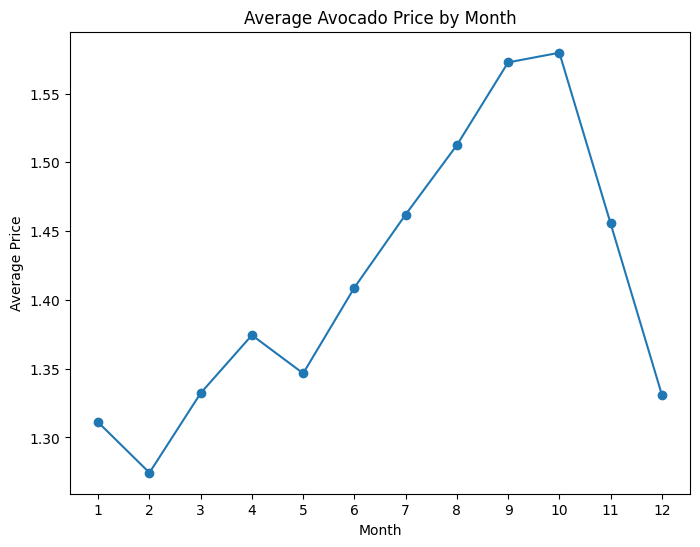

In [ ]:
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])

avocado_df['Month'] = avocado_df['Date'].dt.month

average_price_by_month = avocado_df.groupby('Month')['AveragePrice'].mean()


plt.figure(figsize=(8, 6))
average_price_by_month.plot(marker='o')
plt.title('Average Avocado Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13))
plt.show()


In [ ]:
# Extracting the day of the week
avocado_df['DayOfWeek'] = pd.to_datetime(avocado_df['Date']).dt.day

# Extracting the month
avocado_df['Month'] = pd.to_datetime(avocado_df['Date']).dt.month_name()

# Extracting the year
avocado_df['Year'] = pd.to_datetime(avocado_df['Date']).dt.year

# Print the updated DataFrame
print(avocado_df)

       Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225   
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85  \
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  

How does the average avocado price change from one month to another?

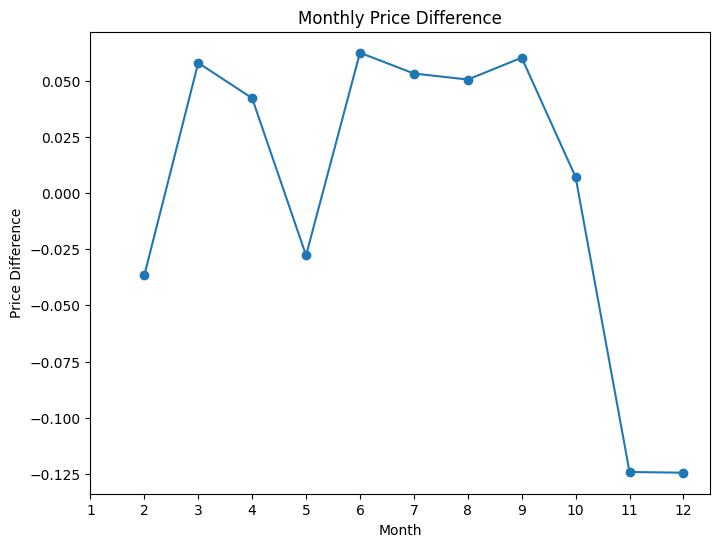

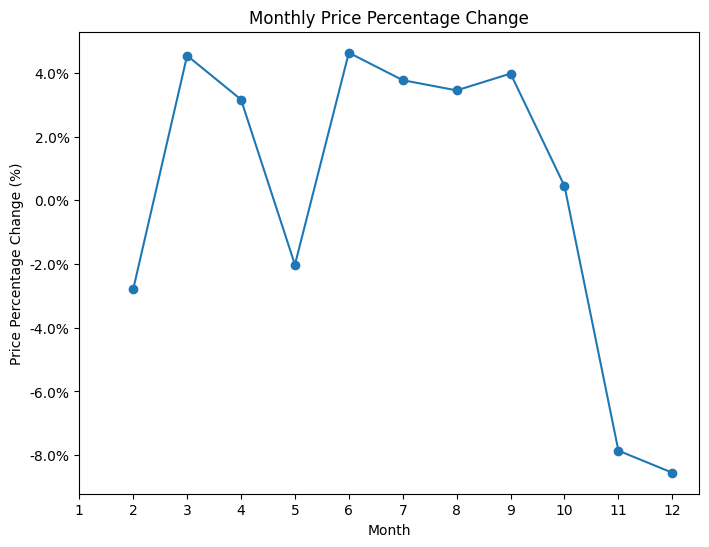

In [ ]:
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])

avocado_df['Month'] = avocado_df['Date'].dt.month

average_price_by_month = avocado_df.groupby('Month')['AveragePrice'].mean()

price_diff = average_price_by_month.diff()  # Price difference
price_pct_change = average_price_by_month.pct_change() * 100  # Price percentage change

plt.figure(figsize=(8, 6))
price_diff.plot(marker='o')
plt.title('Monthly Price Difference')
plt.xlabel('Month')
plt.ylabel('Price Difference')
plt.xticks(range(1, 13))
plt.show()

plt.figure(figsize=(8, 6))
price_pct_change.plot(marker='o')
plt.title('Monthly Price Percentage Change')
plt.xlabel('Month')
plt.ylabel('Price Percentage Change (%)')
plt.xticks(range(1, 13))
plt.gca().yaxis.set_major_formatter('{:.1f}%'.format)
plt.show()





Is there a relationship between the month and the total bags of avocados sold?

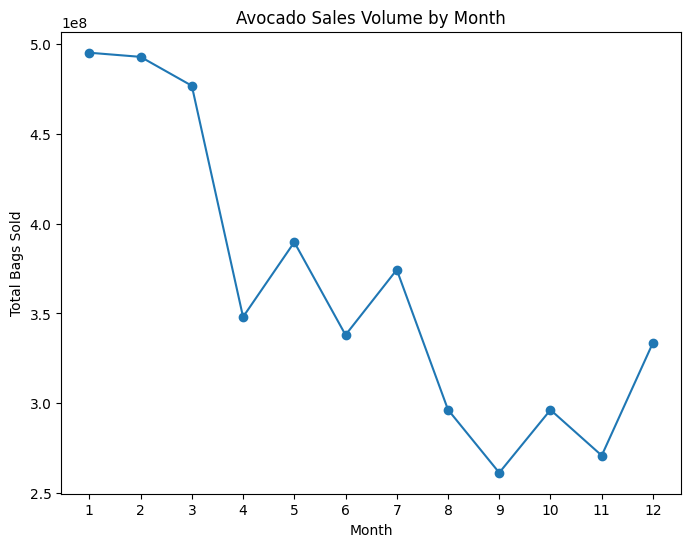

In [ ]:
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])

avocado_df['Month'] = avocado_df['Date'].dt.month

total_bags_by_month = avocado_df.groupby('Month')['Total Bags'].sum()

plt.figure(figsize=(8, 6))
total_bags_by_month.plot(marker='o')
plt.title('Avocado Sales Volume by Month')
plt.xlabel('Month')
plt.ylabel('Total Bags Sold')
plt.xticks(range(1, 13))
plt.show()


Are there any significant fluctuations in avocado sales volume throughout the year?



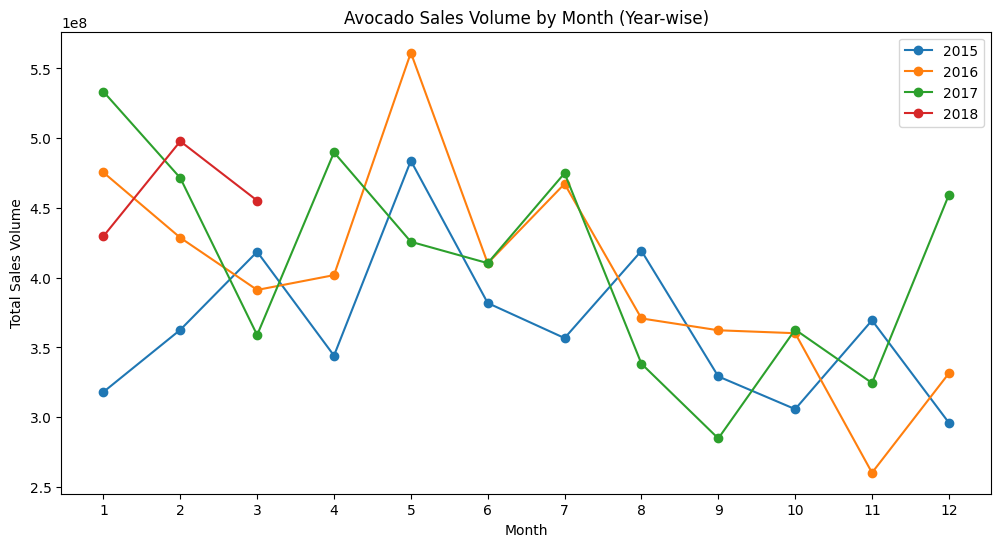

In [ ]:
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])

avocado_df['Year'] = avocado_df['Date'].dt.year

total_volume_by_month = avocado_df.groupby(['Year', 'Month'])['Total Volume'].sum()

total_volume_by_month = total_volume_by_month.reset_index()

plt.figure(figsize=(12, 6))
for year in total_volume_by_month['Year'].unique():
    data_year = total_volume_by_month[total_volume_by_month['Year'] == year]
    plt.plot(data_year['Month'], data_year['Total Volume'], marker='o', label=year)

plt.title('Avocado Sales Volume by Month (Year-wise)')
plt.xlabel('Month')
plt.ylabel('Total Sales Volume')
plt.legend()
plt.xticks(range(1, 13))
plt.show()


What is the average avocado price on weekends versus weekdays?

In [ ]:
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])

avocado_df['DayOfWeek'] = avocado_df['Date'].dt.dayofweek

avocado_df['Weekend'] = avocado_df['DayOfWeek'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')

average_price_by_day = avocado_df.groupby('Weekend')['AveragePrice'].mean()

print("Average Avocado Price - Weekend: ${:.2f}".format(average_price_by_day['Weekend']))
print("Average Avocado Price - Weekday: ${:.2f}".format(average_price_by_day['Weekday']))


Is there a correlation between the average price and the total volume of avocados for each type in different seasons?

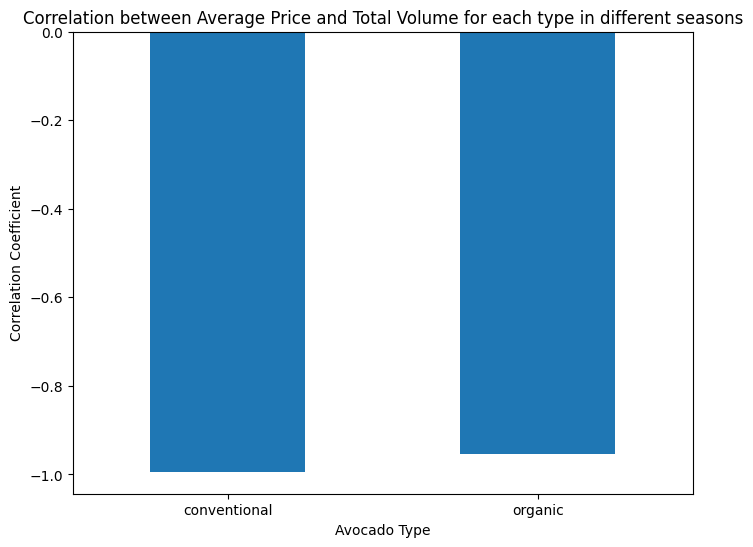

In [ ]:
plt.figure(figsize=(8, 6))
correlation.plot(kind='bar')
plt.title('Correlation between Average Price and Total Volume for each type in different seasons')
plt.xlabel('Avocado Type')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=0)
plt.show()



MACHINE LEARNING

In [ ]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
avocado_df.shape

(18249, 14)

In [ ]:
avocado_df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [ ]:
avocado_df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [ ]:
avocado_df['DayOfWeek'] = pd.to_datetime(avocado_df['Date']).dt.day
avocado_df['Month'] = pd.to_datetime(avocado_df['Date']).dt.month_name
avocado_df['year'] = pd.to_datetime(avocado_df['Date']).dt.year
print(avocado_df)

       Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225   
0               0 2015-12-27          1.33      64236.62  1036.74   54454.85  \
1               1 2015-12-20          1.35      54876.98   674.28   44638.81   
2               2 2015-12-13          0.93     118220.22   794.70  109149.67   
3               3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4 2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...        ...           ...           ...      ...        ...   
18244           7 2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8 2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9 2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10 2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11 2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  

In [ ]:
def get_season(month):
    if month in ['December','January','February']:
        return 1
    elif month in ['March','April','May']:
        return 2
    elif month in ['June','July','August']:
        return 3
    else:
        return 4
    
avocado_df['Seasons'] = avocado_df['Month'].apply(get_season)

print(avocado_df)

       Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225   
0               0 2015-12-27          1.33      64236.62  1036.74   54454.85  \
1               1 2015-12-20          1.35      54876.98   674.28   44638.81   
2               2 2015-12-13          0.93     118220.22   794.70  109149.67   
3               3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4 2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...        ...           ...           ...      ...        ...   
18244           7 2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8 2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9 2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10 2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11 2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
avocado_df['type']= label_encoder.fit_transform(avocado_df['type'])

avocado_df['type'].unique()

array([0, 1])

In [ ]:
avocado_df['Seasons'].unique()

array([4])

In [ ]:
missing_values = avocado_df.isnull().sum()

missing_values_per_column = avocado_df.isnull().sum(axis=0)

print(missing_values)

print(missing_values_per_column)

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
DayOfWeek       0
Month           0
Seasons         0
dtype: int64
Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
DayOfWeek       0
Month           0
Seasons         0
dtype: int64


In [ ]:
columns_of_interest = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags', 'Small Bags', 'Large Bags','XLarge Bags','type']
summary_stats = avocado_df[columns_of_interest].describe()
print(summary_stats)

       AveragePrice  Total Volume          4046          4225          4770   
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04  \
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652  
min    0.000000e+00  0.00000

In [ ]:
correlation0 = avocado_df['AveragePrice'].corr(avocado_df['Total Volume'])
correlation1 = avocado_df['AveragePrice'].corr(avocado_df['4046'])
correlation2 = avocado_df['AveragePrice'].corr(avocado_df['4225'])
correlation3 = avocado_df['AveragePrice'].corr(avocado_df['4770'])
correlation4 = avocado_df['AveragePrice'].corr(avocado_df['Total Bags'])
correlation5 = avocado_df['AveragePrice'].corr(avocado_df['Small Bags'])
correlation6 = avocado_df['AveragePrice'].corr(avocado_df['Large Bags'])
correlation7 = avocado_df['AveragePrice'].corr(avocado_df['XLarge Bags'])

print('Correlation coefficient:/n',
      correlation0,
      correlation1,
      correlation2,
      correlation3,
      correlation4,
      correlation5,
      correlation6,
      correlation7)

Correlation coefficient:/n -0.19275238715271917 -0.20831704848788477 -0.1729277725093354 -0.17944598397975622 -0.17708792839046766 -0.17472978377396522 -0.17294000978530413 -0.11759162287452997


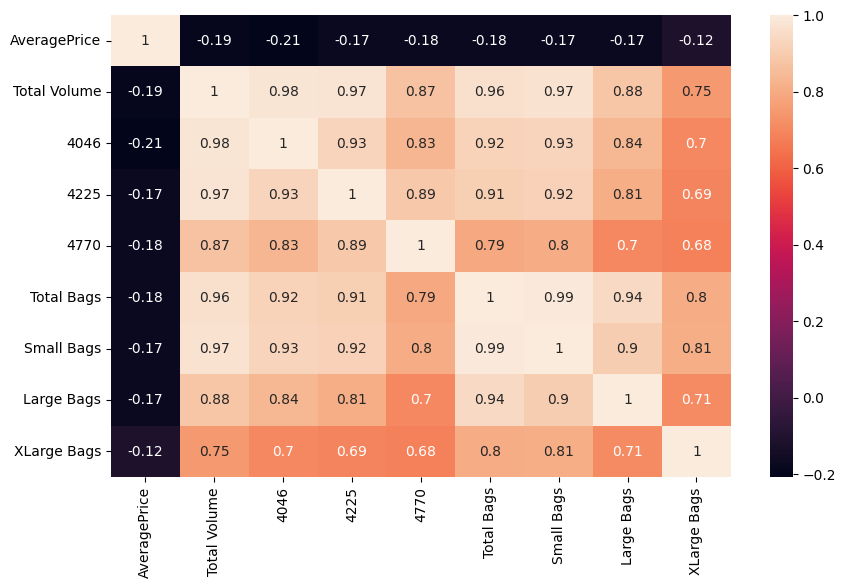

In [ ]:
selected_columns = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
subset_df = avocado_df[selected_columns]
corr = subset_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selected_columns = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

X = avocado_df[selected_columns]
v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(X)
selected_features = v_threshold.get_support()

print(selected_features)

[ True  True  True  True  True  True  True  True  True]


<BarContainer object of 9 artists>

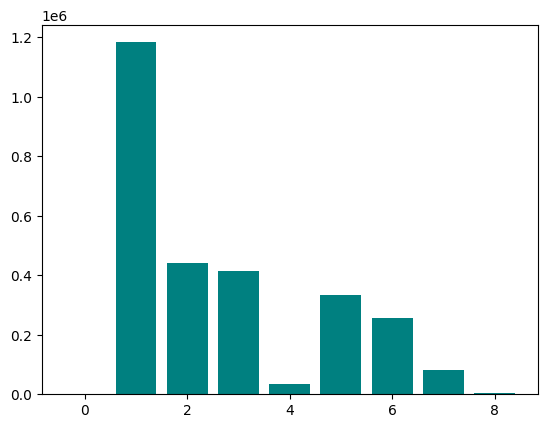

In [ ]:
mean_abs_diff = np.sum(np.abs(X -np.mean(X,axis = 0)), axis =0)/X.shape[0]

plt.bar(np.arange(X.shape[1]),mean_abs_diff, color = 'teal')

In [ ]:
avocado_df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
DayOfWeek          31
Month               1
Seasons             1
dtype: int64

In [ ]:
avocado_df  = avocado_df.drop('year', axis=1)

In [ ]:
avocado_df = avocado_df.drop('Unnamed: 0.1', axis=1)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
avocado_df['DayOfWeek']= label_encoder.fit_transform(avocado_df['DayOfWeek'])
avocado_df['region']= label_encoder.fit_transform(avocado_df['region'])
avocado_df['Month']= label_encoder.fit_transform(avocado_df['Month'])

avocado_df['DayOfWeek'].unique()

array([26, 19, 12,  5, 28, 21, 14,  7,  0, 24, 17, 10,  3, 29, 22, 15,  8,
        1, 25, 18, 11,  4, 27, 20, 13,  6, 30, 23, 16,  9,  2])